In [1]:
import pandas as pd

In [2]:
Casualties = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

In [11]:
Casualties.rename(columns = {'date_of_event': 'date_event',
                             'took_part_in_the_hostilities': 'hostile',
                             'event_location': 'loc',
                             'event_location_district': 'loc_district',
                             'event_location_region': 'loc_region'}, inplace = True)

In [12]:
pd.set_option('display.max_columns', None)
Casualties.head(0)

,name,date_event,age,citizenship,loc,loc_district,loc_region,date_of_death,gender,hostile,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes


In [5]:
Casualties['date_event'] = pd.to_datetime(Casualties['date_event'])

In [6]:
Casualty_ratio = Casualties[(Casualties['citizenship'] == 'Palestinian') | (Casualties['citizenship'] == 'Israeli')]['citizenship'].value_counts()
Casualty_ratio

citizenship
Palestinian    10092
Israeli         1029
Name: count, dtype: int64

<Axes: title={'center': 'Casualty ratio'}, ylabel='count'>

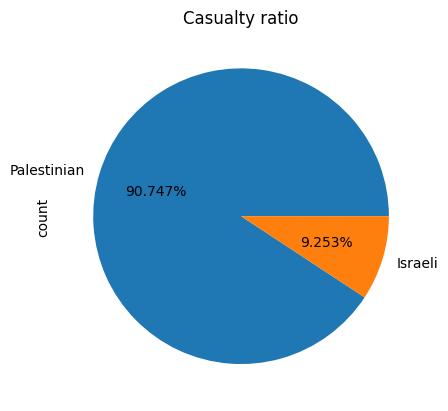

In [7]:
Casualty_ratio.plot(kind = 'pie', title = 'Casualty ratio', autopct = '%.3f%%')

In [24]:
Casualties['hostile'].unique()

array([nan, 'No', 'Yes', 'Unknown', 'Israelis',
       'Object of targeted killing'], dtype=object)

<Axes: title={'center': 'Deaths '}, ylabel='count'>

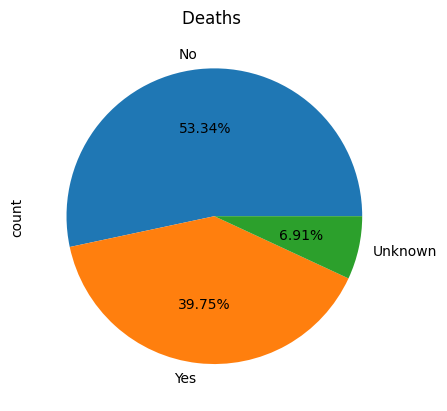

In [27]:
Casualties[(Casualties['hostile'] ==  'No') | (Casualties['hostile'] == 'Yes') | (Casualties['hostile'] == 'Unknown')]['hostile'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Deaths ')